# graphene parameters

In [1]:
%reload_ext autoreload
%autoreload

from sympy import *
from Electromagnetics.graphene_sym import *
from IPython.display import display, Math, Latex
init_printing()

sigma_d, sigma_o, M_n = condKuboLorentzian()

display(Math('\sigma_d = ' + latex(sigma_d)))
display(Math('\sigma_o = ' + latex(sigma_o)))
display(Math('M_n = ' + latex(M_n)))

n, p = carrierDensity()
display(Math('n = ' + latex(n)))
display(Math('p = ' + latex(p)))

DOS = densityOfStates()
display(Math('DOS = ' + latex(DOS)))


### Graphene conductivity

Populating the interactive namespace from numpy and matplotlib
interband omega:  607707006174126.9


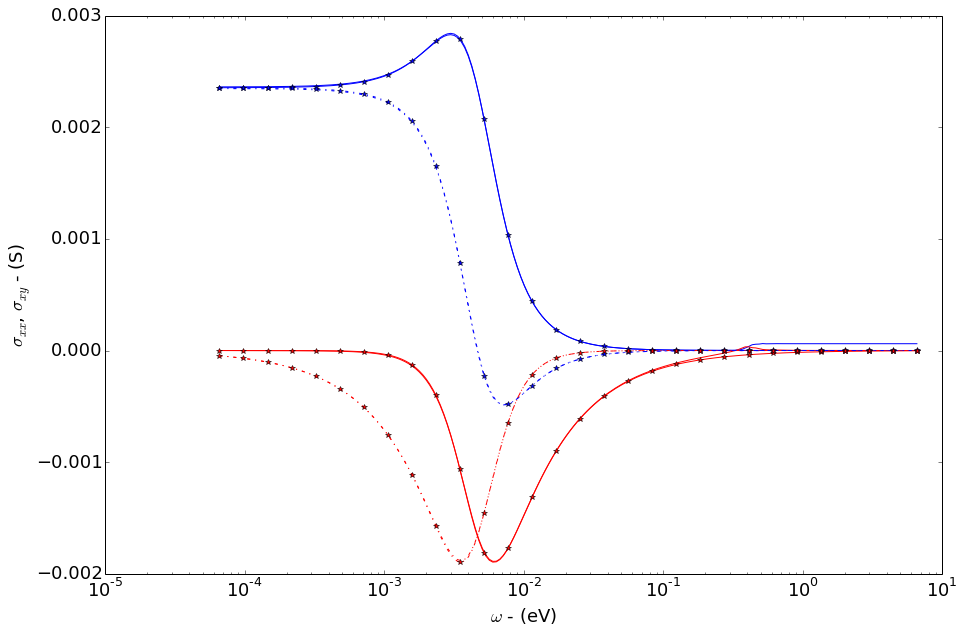

In [1]:
%reload_ext autoreload
%autoreload
%pylab inline

import numpy
from scipy import constants
from Electromagnetics.graphene import *

omega_0=100.0*constants.giga
omega_1=10.0*constants.peta
n_pts = 200

omega = numpy.logspace(log10(omega_0),log10(omega_1), n_pts)
mu_c = 0.2*constants.eV
B_0 = 1.0
tau = 0.2*constants.pico
T = 100.0
omega_in_eVs = True

print('interband omega: ', (2*mu_c/constants.hbar))

sigma_d, sigma_o = condKuboLorentzian(mu_c, B_0, tau, omega, T)
sigma_d_r = numpy.real(sigma_d)
sigma_d_i = numpy.imag(sigma_d)
sigma_o_r = numpy.real(sigma_o)
sigma_o_i = numpy.imag(sigma_o)

figsize(15, 10)
if omega_in_eVs:
    omega *= constants.hbar/constants.e
plot(omega, sigma_d_r, 'b', omega, sigma_d_i, 'r', omega, sigma_o_r, 'b-.', omega, sigma_o_i, 'r-.')

## Drude
omega = numpy.logspace(log10(omega_0),log10(omega_1), n_pts)
sigma_d_Dr, sigma_o_Dr = condDrude(mu_c, B_0, tau, omega, T)
sigma_d_Dr_r = numpy.real(sigma_d_Dr)
sigma_d_Dr_i = numpy.imag(sigma_d_Dr)
sigma_o_Dr_r = numpy.real(sigma_o_Dr)
sigma_o_Dr_i = numpy.imag(sigma_o_Dr)

if omega_in_eVs:
    omega *= constants.hbar/constants.e
plot(omega, sigma_d_Dr_r, 'b',  omega, sigma_d_Dr_i, 'r', omega, sigma_o_Dr_r, 'b-.', omega, sigma_o_Dr_i, 'r-.')

n_pts = 30
omega = numpy.logspace(log10(omega_0),log10(omega_1), n_pts)
sigma_d_Dr, sigma_o_Dr = condDrude(mu_c, B_0, tau, omega, T)
sigma_d_Dr_r = numpy.real(sigma_d_Dr)
sigma_d_Dr_i = numpy.imag(sigma_d_Dr)
sigma_o_Dr_r = numpy.real(sigma_o_Dr)
sigma_o_Dr_i = numpy.imag(sigma_o_Dr)

if omega_in_eVs:
    omega *= constants.hbar/constants.e
plot(omega, sigma_d_Dr_r, 'b*',  omega, sigma_d_Dr_i, 'r*', omega, sigma_o_Dr_r, 'b*', omega, sigma_o_Dr_i, 'r*')

x_scale = '(rad/s)'
if omega_in_eVs:
    x_scale = '(eV)'
xlabel('$\\omega$ - ' + x_scale, fontsize=18)
ylabel('$\\sigma_{xx}$, $\\sigma_{xy}$ - (S)', fontsize=18)
xscale('log')

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

## intraband vs interband

Populating the interactive namespace from numpy and matplotlib
interband omega:  303853503087063.44


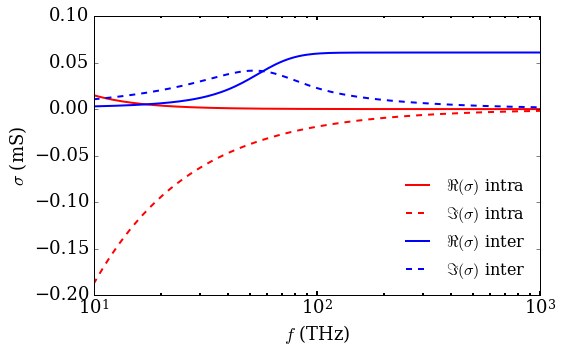

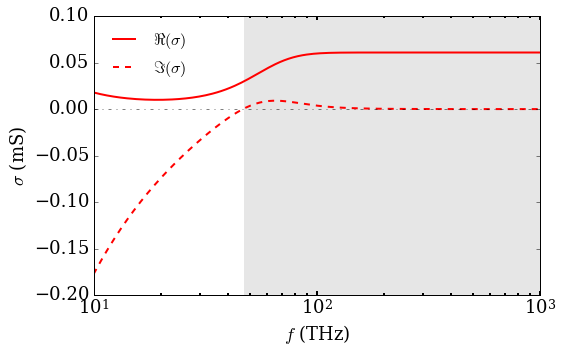

LL((0) : 0.0   0.0
LL((1) : 0.0   0.0
LL((2) : 0.0   0.0
LL((3) : 0.0   0.0
LL((4) : 0.0   0.0
LL((5) : 0.0   0.0
LL((6) : 0.0   0.0
LL((7) : 0.0   0.0
LL((8) : 0.0   0.0
LL((9) : 0.0   0.0


In [4]:
%reload_ext autoreload
%autoreload
%pylab inline

import numpy
from scipy import constants
from Electromagnetics.graphene import *
import math

omega_0=10.0*constants.tera*2.0*math.pi
omega_1=1000.0*constants.tera*2.0*math.pi
n_pts = 200

omega = numpy.logspace(log10(omega_0),log10(omega_1), n_pts)
mu_c = 0.1*constants.eV
B_0 = 0.0
tau = 0.2*constants.pico
T = 300.00
omega_in_eVs = False

print('interband omega: ', (2*mu_c/constants.hbar))

sigma_scale = constants.milli

sigma_d, sigma_o = condKuboLorentzian(mu_c, B_0, tau, omega, T, seperate_intra_inter=True)
sigma_d_intra_r = numpy.real(sigma_d[0])/sigma_scale
sigma_d_intra_i = numpy.imag(sigma_d[0])/sigma_scale
sigma_d_inter_r = numpy.real(sigma_d[1])/sigma_scale
sigma_d_inter_i = numpy.imag(sigma_d[1])/sigma_scale
sigma_o_intra_r = numpy.real(sigma_o[0])/sigma_scale
sigma_o_intra_i = numpy.imag(sigma_o[0])/sigma_scale
sigma_o_inter_r = numpy.real(sigma_o[1])/sigma_scale
sigma_o_inter_i = numpy.imag(sigma_o[1])/sigma_scale

figsize(8, 5)

x_label_str = '$\\omega$ (rad/s)'
if omega_in_eVs:
    omega *= constants.hbar/constants.e
    x_label_str = '$\\omega$ (eV)'
else:
    omega /= 2.0*math.pi*constants.tera
    x_label_str = '$f$ (THz)'
    
y_label_str = '$\\sigma_{xx}$, $\\sigma_{xy}$'
if B_0==0.0:
    y_label_str = '$\\sigma$'

y_scale_str = '(S)' 
if sigma_scale==constants.milli:
    y_scale_str = '(mS)'
    
fig = figure()
if B_0==0.0:
    plot(omega, sigma_d_intra_r, 'r', linewidth=2, label='$\\Re(\\sigma)$ intra')
    plot(omega, sigma_d_intra_i, 'r--', linewidth=2, label='$\\Im(\\sigma)$ intra')
    plot(omega, sigma_d_inter_r, 'b', linewidth=2, label='$\\Re(\\sigma)$ inter')
    plot(omega, sigma_d_inter_i, 'b--', linewidth=2, label='$\\Im(\\sigma)$ inter')
else:
    plot(omega, sigma_d_intra_r, 'r', linewidth=2, label='$\\Re(\\sigma_d)$ intra')
    plot(omega, sigma_d_intra_i, 'r--', linewidth=2, label='$\\Im(\\sigma_d)$ intra')
    plot(omega, sigma_d_inter_r, 'b', linewidth=2, label='$\\Re(\\sigma_d)$ inter')
    plot(omega, sigma_d_inter_i, 'b--', linewidth=2, label='$\\Im(\\sigma_d)$ inter')
    plot(omega, sigma_o_intra_r, 'g', linewidth=2, label='$\\Re(\\sigma_o)$ intra')
    plot(omega, sigma_o_intra_i, 'g--', linewidth=2, label='$\\Im(\\sigma_o)$ intra')
    plot(omega, sigma_o_inter_r, 'y', linewidth=2, label='$\\Re(\\sigma_o)$ inter')
    plot(omega, sigma_o_inter_i, 'y--', linewidth=2, label='$\\Im(\\sigma_o)$ inter')

xlabel(x_label_str, fontsize=18)
ylabel(y_label_str+' '+y_scale_str, fontsize=18)
xscale('log')
legend(loc='best', fontsize=16, frameon=False)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

ax = gca()
ax.xaxis.set_tick_params(width=2)
ax.xaxis.set_tick_params(which=u'minor', width=2)

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'graphene-ferrite')
file_ext = '.eps'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

file_name = os.path.join(dir_name, 'cond-intra-inter'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()



if B_0==0.0:
    plot(omega, sigma_d_intra_r+sigma_d_inter_r, 'r', linewidth=2, label='$\\Re(\\sigma)$')
    plot(omega, sigma_d_intra_i+sigma_d_inter_i, 'r--', linewidth=2, label='$\\Im(\\sigma)$')
    f_m = omega[np.argmax((sigma_d_intra_i+sigma_d_inter_i)>=0.0)]
    f_p = omega[-1]
    y0, y1 = gca().get_ylim()
    gca().add_patch(Rectangle((f_m, y0), width=f_p-f_m, height=y1-y0, color=(0.9, 0.9, 0.9), fill=True, alpha=1.0))
else:
    plot(omega, sigma_d_intra_r+sigma_d_inter_r, 'r', linewidth=2, label='$\\Re(\\sigma_d)$')
    plot(omega, sigma_d_intra_i+sigma_d_inter_i, 'r--', linewidth=2, label='$\\Im(\\sigma_d)$')
    plot(omega, sigma_o_intra_r+sigma_o_inter_r, 'b', linewidth=2, label='$\\Re(\\sigma_o)$')
    plot(omega, sigma_o_intra_i+sigma_o_inter_i, 'b--', linewidth=2, label='$\\Im(\\sigma_o)$')

axhline(y=0.0, linewidth=0.5, linestyle='-.', color='k')

xlabel(x_label_str, fontsize=18)
ylabel(y_label_str+' '+y_scale_str, fontsize=18)
xscale('log')
legend(loc='best', fontsize=16, frameon=False)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

ax = gca()
ax.xaxis.set_tick_params(width=2)
ax.xaxis.set_tick_params(which=u'minor', width=2)

    
file_name = os.path.join(dir_name, 'cond-total'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()


for n in range(10):
    LL = LandauLevel(B_0, n)
    LL_ev = LL/constants.eV
    omega_LL = (LandauLevel(B_0, n+1) - LandauLevel(B_0, n))/constants.hbar
    print('LL(({0}) : {1}   {2}'.format(n, LL_ev, omega_LL))


## carrier density

Populating the interactive namespace from numpy and matplotlib


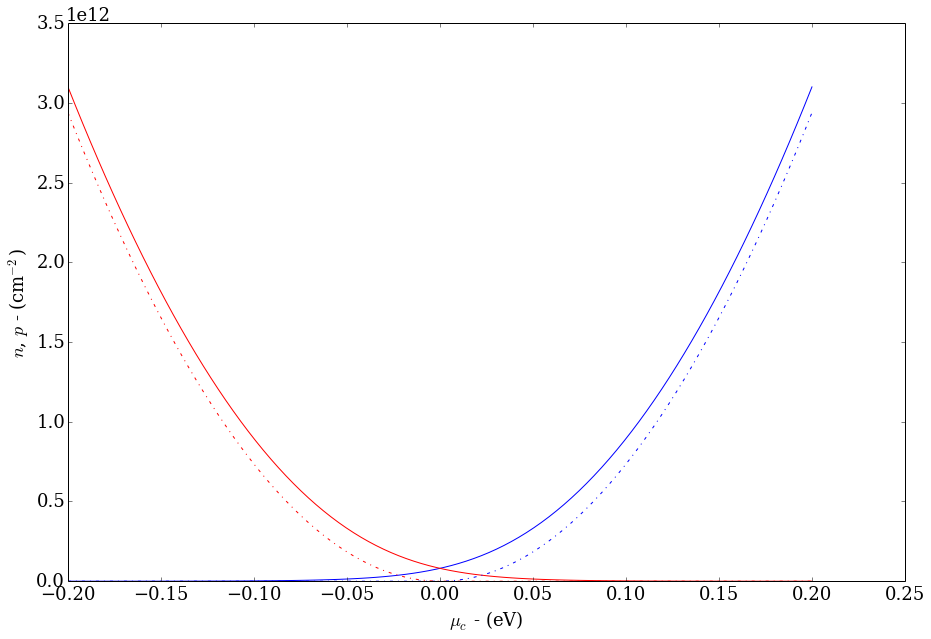

In [7]:
%reload_ext autoreload
%autoreload
%pylab inline

import numpy
from scipy import constants
from Electromagnetics.graphene import *

mu_c_max = 0.2
n_pts = 100
mu_c = numpy.linspace(-mu_c_max, mu_c_max, n_pts)*constants.eV
T = 300.0

n, p = carrierDensity(mu_c, T)
n *= constants.centi**2
p *= constants.centi**2

figsize(15, 10)
mu_c /= constants.eV
plot(mu_c, n, 'b', mu_c, p, 'r')


mu_c = numpy.linspace(-mu_c_max, mu_c_max, n_pts)*constants.eV
T = 0.0
n, p = carrierDensity(mu_c, T)
n *= constants.centi**2
p *= constants.centi**2
mu_c /= constants.eV
plot(mu_c, n, 'b-.', mu_c, p, 'r-.')


xlabel('$\\mu_c$ - (eV)', fontsize=18)
ylabel('$n$, $p$ - (cm$^{-2}$)', fontsize=18)
font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

ax = gca()
ax.ticklabel_format(axis='y', useOffset=False)

